# Simulación del Juego Serpientes y Escaleras

Este notebook implementa una simulación del juego **Serpientes y Escaleras** utilizando cadenas de Markov para analizar las probabilidades de transición entre casillas y calcular el número esperado de pasos para completar el juego.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Construcción de la Matriz de Transición

La matriz de transición `P` representa las probabilidades de moverse de una casilla a otra. Cada fila corresponde a una casilla del tablero (0-100) y modela las 6 posibles salidas al lanzar un dado, considerando las serpientes y escaleras.

In [23]:
# Inicializar matriz de transición (101 estados: casillas 0-100)
P = np.zeros((101, 101))

def r(row, inp):
    """
    Asigna probabilidades de transición para una casilla.
    
    Args:
        row: casilla actual
        inp: lista de 6 casillas destino (resultados del dado 1-6)
    """
    for i in range(6):
        P[row, inp[i]] += 1/6

# Definir transiciones para cada casilla (incluye efectos de serpientes y escaleras)
r(0, [38, 2, 3, 14, 5, 6])      # Casilla 1 -> escalera a 38
r(1, [2, 3, 14, 5, 6, 7])
r(2, [3, 14, 5, 6, 7, 8])       # Casilla 4 -> escalera a 14
r(3, [14, 5, 6, 7, 8, 31])      # Casilla 9 -> escalera a 31
r(4, [5, 6, 7, 8, 31, 10])
r(5, [6, 7, 8, 31, 10, 11])
r(6, [7, 8, 31, 10, 11, 12])
r(7, [8, 31, 10, 11, 12, 13])
r(8, [31, 10, 11, 12, 13, 14])
r(9, [10, 11, 12, 13, 14, 15])
r(10, [11, 12, 13, 14, 15, 6])  # Casilla 16 -> serpiente a 6
r(11, [12, 13, 14, 15, 6, 17])
r(12, [13, 14, 15, 6, 17, 18])
r(13, [14, 15, 6, 17, 18, 19])
r(14, [15, 6, 17, 18, 19, 20])
r(15, [6, 17, 18, 19, 20, 42])  # Casilla 21 -> escalera a 42
r(16, [17, 18, 19, 20, 42, 22])
r(17, [18, 19, 20, 42, 22, 23])
r(18, [19, 20, 42, 22, 23, 24])
r(19, [20, 42, 22, 23, 24, 25])
r(20, [42, 22, 23, 24, 25, 26])
r(21, [22, 23, 24, 25, 26, 27])
r(22, [23, 24, 25, 26, 27, 84]) # Casilla 28 -> escalera a 84
r(23, [24, 25, 26, 27, 84, 29])
r(24, [25, 26, 27, 84, 29, 30])
r(25, [26, 27, 84, 29, 30, 31])
r(26, [27, 84, 29, 30, 31, 32])
r(27, [84, 29, 30, 31, 32, 33])
r(28, [29, 30, 31, 32, 33, 34])
r(29, [30, 31, 32, 33, 34, 35])
r(30, [31, 32, 33, 34, 35, 44]) # Casilla 36 -> escalera a 44
r(31, [32, 33, 34, 35, 44, 37])
r(32, [33, 34, 35, 44, 37, 38])
r(33, [34, 35, 44, 37, 38, 39])
r(34, [35, 44, 37, 38, 39, 40])
r(35, [44, 37, 38, 39, 40, 41])
r(36, [37, 38, 39, 40, 41, 42])
r(37, [38, 39, 40, 41, 42, 43])
r(38, [39, 40, 41, 42, 43, 44])
r(39, [40, 41, 42, 43, 44, 45])
r(40, [41, 42, 43, 44, 45, 46])
r(41, [42, 43, 44, 45, 46, 47])
r(42, [43, 44, 45, 46, 47, 26]) # Casilla 48 -> serpiente a 26
r(43, [44, 45, 46, 47, 26, 11]) # Casilla 49 -> serpiente a 11
r(44, [45, 46, 47, 26, 11, 50])
r(45, [46, 47, 26, 11, 50, 67]) # Casilla 51 -> escalera a 67
r(46, [47, 26, 11, 50, 67, 52])
r(47, [26, 11, 50, 67, 52, 53])
r(48, [11, 50, 67, 52, 53, 54])
r(49, [50, 67, 52, 53, 54, 55])
r(50, [67, 52, 53, 54, 55, 53]) # Casilla 56 -> serpiente a 53
r(51, [52, 53, 54, 55, 53, 57])
r(52, [53, 54, 55, 53, 57, 58])
r(53, [54, 55, 53, 57, 58, 59])
r(54, [55, 53, 57, 58, 59, 60])
r(55, [53, 57, 58, 59, 60, 61])
r(56, [57, 58, 59, 60, 61, 19]) # Casilla 62 -> serpiente a 19
r(57, [58, 59, 60, 61, 19, 63])
r(58, [59, 60, 61, 19, 63, 60]) # Casilla 64 -> serpiente a 60
r(59, [60, 61, 19, 63, 60, 65])
r(60, [61, 19, 63, 60, 65, 66])
r(61, [19, 63, 60, 65, 66, 67])
r(62, [63, 60, 65, 66, 67, 68])
r(63, [60, 65, 66, 67, 68, 69])
r(64, [65, 66, 67, 68, 69, 70])
r(65, [66, 67, 68, 69, 70, 91]) # Casilla 71 -> escalera a 91
r(66, [67, 68, 69, 70, 91, 72])
r(67, [68, 69, 70, 91, 72, 73])
r(68, [69, 70, 91, 72, 73, 74])
r(69, [70, 91, 72, 73, 74, 75])
r(70, [91, 72, 73, 74, 75, 76])
r(71, [72, 73, 74, 75, 76, 77])
r(72, [73, 74, 75, 76, 77, 78])
r(73, [74, 75, 76, 77, 78, 79])
r(74, [75, 76, 77, 78, 79, 100]) # Casilla 80 -> escalera a 100 (¡victoria!)
r(75, [76, 77, 78, 79, 100, 81])
r(76, [77, 78, 79, 100, 81, 82])
r(77, [78, 79, 100, 81, 82, 83])
r(78, [79, 100, 81, 82, 83, 84])
r(79, [100, 81, 82, 83, 84, 85])
r(80, [81, 82, 83, 84, 85, 86])
r(81, [82, 83, 84, 85, 86, 24]) # Casilla 87 -> serpiente a 24
r(82, [83, 84, 85, 86, 24, 88])
r(83, [84, 85, 86, 24, 88, 89])
r(84, [85, 86, 24, 88, 89, 90])
r(85, [86, 24, 88, 89, 90, 91])
r(86, [24, 88, 89, 90, 91, 92])
r(87, [88, 89, 90, 91, 92, 73]) # Casilla 93 -> serpiente a 73
r(88, [89, 90, 91, 92, 73, 94])
r(89, [90, 91, 92, 73, 94, 75]) # Casilla 95 -> serpiente a 75
r(90, [91, 92, 73, 94, 75, 96])
r(91, [92, 73, 94, 75, 96, 97])
r(92, [73, 94, 75, 96, 97, 78]) # Casilla 98 -> serpiente a 78
r(93, [94, 75, 96, 97, 78, 99])
r(94, [75, 96, 97, 78, 99, 100])
r(95, [96, 97, 78, 99, 100, 95]) # Casilla 101 desborda, regresa a 95
r(96, [97, 78, 99, 100, 96, 96])
r(97, [78, 99, 100, 97, 97, 97])
r(98, [99, 100, 98, 98, 98, 98])
r(99, [100, 99, 99, 99, 99, 99])
r(100, [100, 100, 100, 100, 100, 100]) # Estado absorbente (fin del juego)

print("✓ Matriz de transición construida")

✓ Matriz de transición construida


### Visualización de la Matriz de Transición

Inspeccionamos la estructura de la matriz de transición.

In [24]:
# Extraer submatriz de estados transitorios (excluye el estado absorbente 100)
M = P[:100, :100]

# Calcular matriz fundamental: F = (I - M)^(-1)
F = np.linalg.inv(np.eye(100) - M)

# Calcular tiempos esperados de absorción desde cada estado
expected_steps = F @ np.ones(100)

print("Tiempo esperado de absorción desde estados iniciales:")
print(f"  Desde casilla 0: {expected_steps[0]:.2f} pasos")
print(f"  Desde casilla 50: {expected_steps[50]:.2f} pasos")
print(f"  Desde casilla 90: {expected_steps[90]:.2f} pasos")

Tiempo esperado de absorción desde estados iniciales:
  Desde casilla 0: 39.60 pasos
  Desde casilla 50: 28.58 pasos
  Desde casilla 90: 16.79 pasos


## 4. Análisis Teórico: Matriz Fundamental

Calculamos el tiempo esperado de absorción usando la matriz fundamental de la cadena de Markov.

In [25]:
def steps_to_reach_100():
    """
    Simula una partida completa hasta alcanzar la casilla 100.
    
    Returns:
        Número de pasos necesarios para completar el juego
    """
    current = 0
    steps = 0
    
    while current != 100:
        current = np.random.choice(range(101), p=P[current])
        steps += 1
    
    return steps

# Realizar 1000 simulaciones
num_simulations = 1000
simlist = [steps_to_reach_100() for _ in range(num_simulations)]

# Calcular estadísticas
mean_steps = np.mean(simlist)
std_steps = np.std(simlist)
min_steps = np.min(simlist)
max_steps = np.max(simlist)

print(f"Resultados de {num_simulations} simulaciones:")
print(f"  Promedio de pasos: {mean_steps:.2f}")
print(f"  Desviación estándar: {std_steps:.2f}")
print(f"  Mínimo de pasos: {min_steps}")
print(f"  Máximo de pasos: {max_steps}")

Resultados de 1000 simulaciones:
  Promedio de pasos: 40.07
  Desviación estándar: 25.47
  Mínimo de pasos: 8
  Máximo de pasos: 192


## 3. Análisis Estadístico: Tiempo de Absorción

Calculamos el número promedio de pasos necesarios para completar el juego mediante simulación Monte Carlo.

In [26]:
# Distribución inicial: comenzamos en la casilla 0
init = np.zeros(101)
init[0] = 1

# Simular 50 pasos del juego
simulation = markov(init, P, 50, list(range(101)))
print("Trayectoria de una partida (primeros 10 pasos):")
print(simulation[:10])

Trayectoria de una partida (primeros 10 pasos):
[np.int64(0), np.int64(3), np.int64(5), np.int64(31), np.int64(32), np.int64(37), np.int64(38), np.int64(41), np.int64(44), np.int64(46)]


### 2.1 Ejemplo de una partida

Simulamos una partida de ejemplo para visualizar cómo se desarrolla el juego.

In [27]:
def markov(init, P, steps, states):
    """
    Simula una cadena de Markov.
    
    Args:
        init: distribución inicial de probabilidades
        P: matriz de transición
        steps: número de pasos a simular
        states: lista de estados posibles
        
    Returns:
        Lista con el historial de estados visitados
    """
    current_state = np.random.choice(states, p=init)
    history = [current_state]
    
    for _ in range(steps):
        current_state = np.random.choice(states, p=P[current_state])
        history.append(current_state)
    
    return history

## 2. Simulación de la Cadena de Markov

Implementamos una función para simular el proceso estocástico del juego.

In [28]:
# Mostrar primeras filas de la matriz de transición
print("Primeras 5 casillas y sus probabilidades de transición:")
print("(Cada fila muestra las probabilidades de ir a otras casillas)\n")

for i in range(5):
    non_zero = np.where(P[i] > 0)[0]
    print(f"Casilla {i}: puede ir a {list(non_zero)} con prob 1/6 cada una")

Primeras 5 casillas y sus probabilidades de transición:
(Cada fila muestra las probabilidades de ir a otras casillas)

Casilla 0: puede ir a [np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(14), np.int64(38)] con prob 1/6 cada una
Casilla 1: puede ir a [np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(14)] con prob 1/6 cada una
Casilla 2: puede ir a [np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(14)] con prob 1/6 cada una
Casilla 3: puede ir a [np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(14), np.int64(31)] con prob 1/6 cada una
Casilla 4: puede ir a [np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(10), np.int64(31)] con prob 1/6 cada una


In [29]:
# Análisis de la estructura: identificar serpientes y escaleras
escaleras = []
serpientes = []

for i in range(100):
    # Encontrar transiciones no-estándar (no son movimientos consecutivos normales)
    non_zero = np.where(P[i] > 0)[0]
    
    for dest in non_zero:
        # Una escalera/serpiente se identifica si el destino está muy alejado del origen
        expected_range = list(range(i+1, min(i+7, 101)))
        if dest not in expected_range and dest != i:
            if dest > i + 6:  # Es una escalera (salto grande hacia adelante)
                escaleras.append((i, dest))
            elif dest < i:  # Es una serpiente (retroceso)
                serpientes.append((i, dest))

# Eliminar duplicados (debido a las 6 opciones del dado)
escaleras = list(set(escaleras))
serpientes = list(set(serpientes))

escaleras.sort()
serpientes.sort()

print("=== ESCALERAS IDENTIFICADAS ===")
print(f"Total: {len(escaleras)} escaleras\n")
for origen, destino in escaleras:
    print(f"  Casilla {origen:2d} → {destino:3d}  (avance: +{destino-origen})")

print(f"\n=== SERPIENTES IDENTIFICADAS ===")
print(f"Total: {len(serpientes)} serpientes\n")
for origen, destino in serpientes:
    print(f"  Casilla {origen:2d} → {destino:3d}  (retroceso: {destino-origen})")

=== ESCALERAS IDENTIFICADAS ===
Total: 47 escaleras

  Casilla  0 →  14  (avance: +14)
  Casilla  0 →  38  (avance: +38)
  Casilla  1 →  14  (avance: +13)
  Casilla  2 →  14  (avance: +12)
  Casilla  3 →  14  (avance: +11)
  Casilla  3 →  31  (avance: +28)
  Casilla  4 →  31  (avance: +27)
  Casilla  5 →  31  (avance: +26)
  Casilla  6 →  31  (avance: +25)
  Casilla  7 →  31  (avance: +24)
  Casilla  8 →  31  (avance: +23)
  Casilla 15 →  42  (avance: +27)
  Casilla 16 →  42  (avance: +26)
  Casilla 17 →  42  (avance: +25)
  Casilla 18 →  42  (avance: +24)
  Casilla 19 →  42  (avance: +23)
  Casilla 20 →  42  (avance: +22)
  Casilla 22 →  84  (avance: +62)
  Casilla 23 →  84  (avance: +61)
  Casilla 24 →  84  (avance: +60)
  Casilla 25 →  84  (avance: +59)
  Casilla 26 →  84  (avance: +58)
  Casilla 27 →  84  (avance: +57)
  Casilla 30 →  44  (avance: +14)
  Casilla 31 →  44  (avance: +13)
  Casilla 32 →  44  (avance: +12)
  Casilla 33 →  44  (avance: +11)
  Casilla 34 →  44  (avance: 

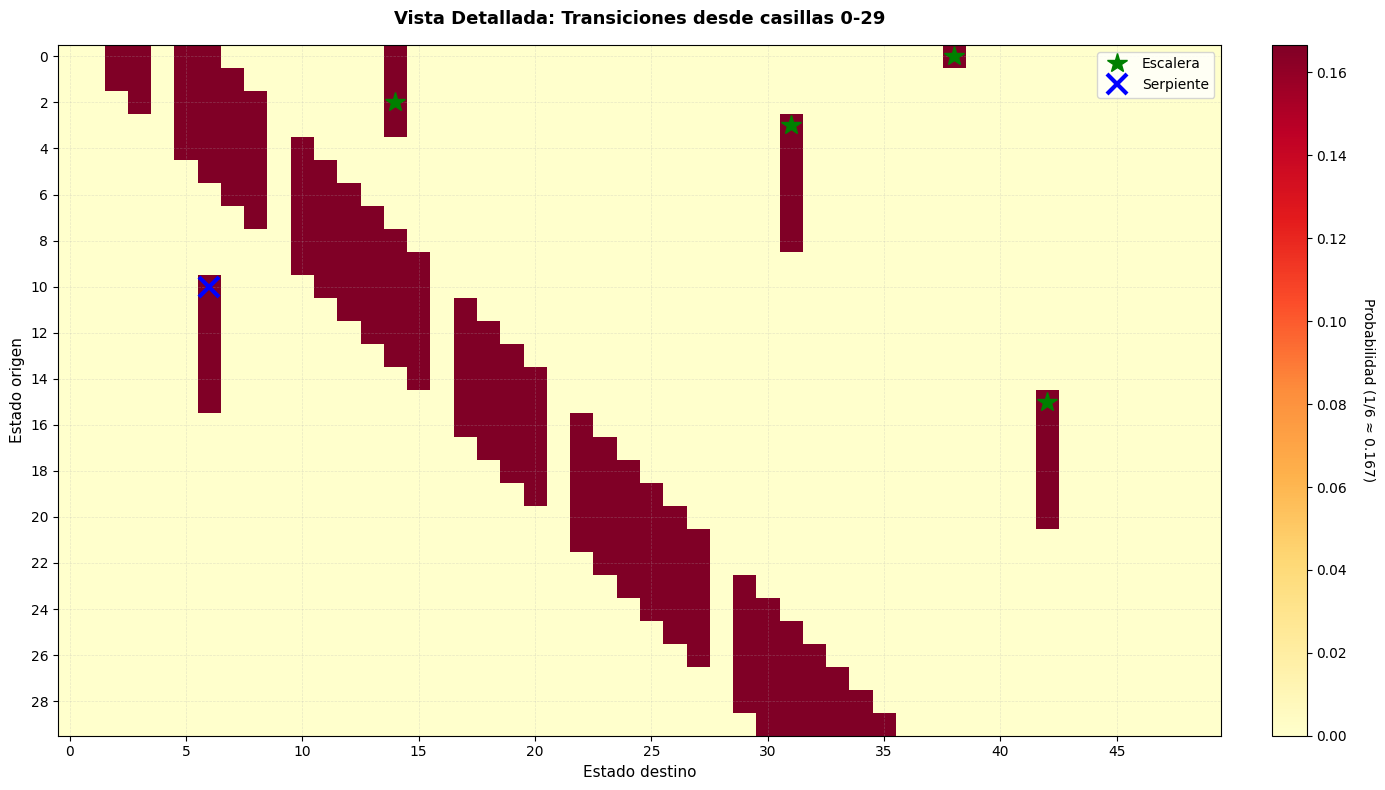

In [30]:
# Vista detallada: transiciones desde las primeras 30 casillas
fig, ax = plt.subplots(figsize=(14, 8))

# Mostrar submatriz para mejor visualización
submatrix = P[:30, :50]
im = ax.imshow(submatrix, cmap='YlOrRd', aspect='auto', interpolation='nearest')

ax.set_xlabel('Estado destino', fontsize=11)
ax.set_ylabel('Estado origen', fontsize=11)
ax.set_title('Vista Detallada: Transiciones desde casillas 0-29', 
             fontsize=13, fontweight='bold', pad=15)

cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Probabilidad (1/6 ≈ 0.167)', rotation=270, labelpad=20)

# Marcar todas las casillas en esta vista
ax.set_xticks(range(0, 50, 5))
ax.set_yticks(range(0, 30, 2))

# Resaltar algunas transiciones especiales
# Escalera en casilla 1 -> 38
ax.plot(38, 0, 'g*', markersize=15, label='Escalera')
# Escalera en casilla 4 -> 14
ax.plot(14, 2, 'g*', markersize=15)
# Escalera en casilla 9 -> 31
ax.plot(31, 3, 'g*', markersize=15)
# Escalera en casilla 21 -> 42
ax.plot(42, 15, 'g*', markersize=15)
# Serpiente en casilla 16 -> 6
ax.plot(6, 10, 'bx', markersize=15, markeredgewidth=3, label='Serpiente')

ax.legend(loc='upper right', fontsize=10)
ax.grid(True, which='major', alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

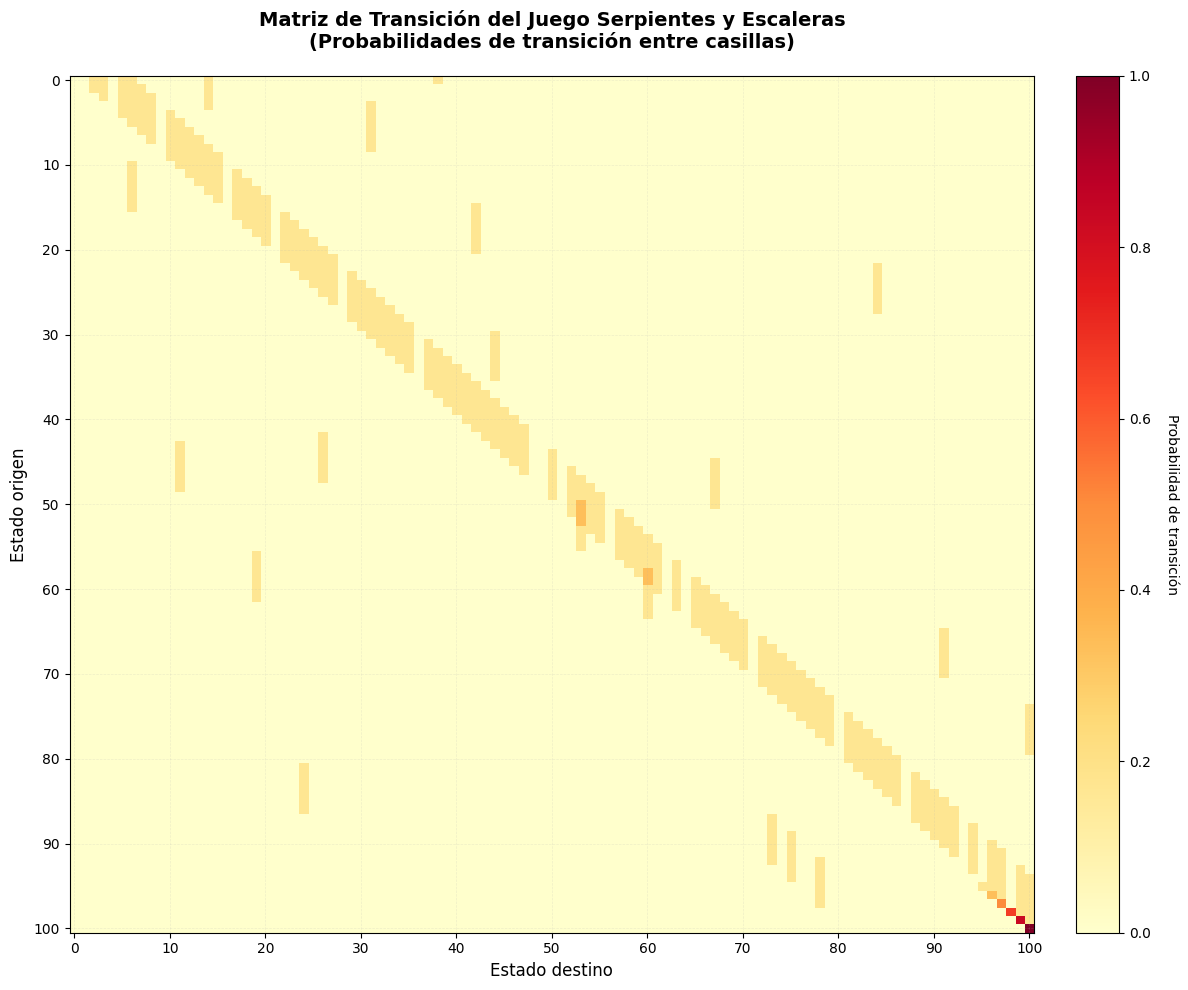


Interpretación:
- Las líneas diagonales desplazadas representan los movimientos normales del dado (1-6)
- Los puntos brillantes fuera de las diagonales indican serpientes y escaleras
- La última columna muestra las transiciones al estado absorbente (casilla 100)


In [31]:
# Visualizar la matriz de transición completa como mapa de calor
fig, ax = plt.subplots(figsize=(12, 10))

# Crear mapa de calor de la matriz de transición
im = ax.imshow(P, cmap='YlOrRd', aspect='auto', interpolation='nearest')

# Configurar ejes
ax.set_xlabel('Estado destino', fontsize=12)
ax.set_ylabel('Estado origen', fontsize=12)
ax.set_title('Matriz de Transición del Juego Serpientes y Escaleras\n(Probabilidades de transición entre casillas)', 
             fontsize=14, fontweight='bold', pad=20)

# Agregar colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Probabilidad de transición', rotation=270, labelpad=20)

# Marcar cada 10 casillas para mejor legibilidad
tick_positions = list(range(0, 101, 10))
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)

# Agregar líneas de cuadrícula sutiles
ax.grid(True, which='major', alpha=0.2, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\nInterpretación:")
print("- Las líneas diagonales desplazadas representan los movimientos normales del dado (1-6)")
print("- Los puntos brillantes fuera de las diagonales indican serpientes y escaleras")
print("- La última columna muestra las transiciones al estado absorbente (casilla 100)")